In [183]:
#Step 1 #Libraries Import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 


In [184]:
#Based on the features, make a model to tell whether the person survived or not?

In [185]:
#Step 2 #Data Import
df0= pd.read_csv("/content/titanic-training-data.csv")
df= pd.read_csv("/content/titanic-training-data.csv")

In [186]:
#Step 3 Data Visualisation
df.shape

(891, 12)

In [187]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [189]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [193]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

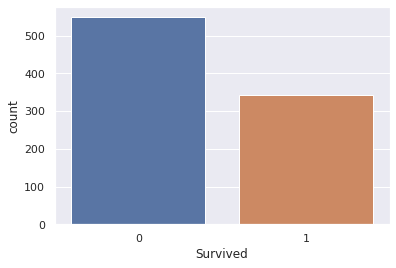

In [194]:
#Survived - Non survived Pattern 
sb.countplot(x="Survived",data=df)

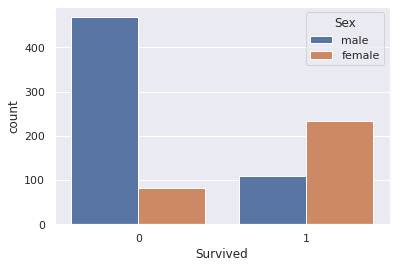

In [195]:
sb.countplot(x="Survived",hue="Sex",data= df)

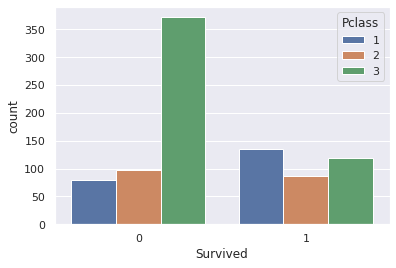

In [196]:
#Pattern of Survived - Non survied according to PClass

sb.countplot(x="Survived",hue="Pclass",data= df)

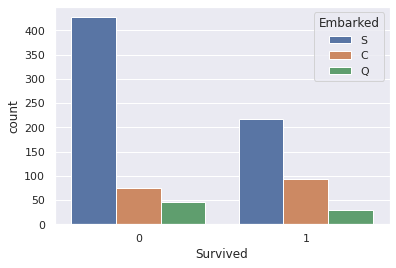

In [197]:
#Pattern of Survived - Non survied according to Embarked
sb.countplot(x="Survived",hue="Embarked",data= df)

Text(0.5, 0.98, 'Survival rates for male and female')

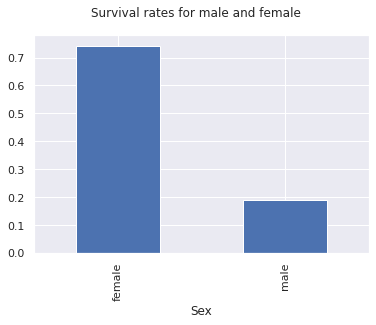

In [198]:
df[['Sex',"Survived"]].groupby('Sex')['Survived'].mean().plot(kind='bar',figsize=(6,4))
plt.suptitle("Survival rates for male and female")

Text(0.5, 0.98, 'Survival rates for embarking from different port')

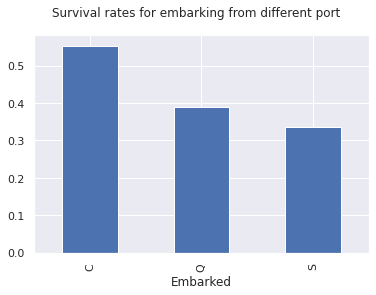

In [199]:
#Survival rate for C,Q,S
df[['Embarked',"Survived"]].groupby('Embarked')['Survived'].mean().plot(kind='bar',figsize=(6,4))
plt.suptitle("Survival rates for embarking from different port")

Text(0.5, 0.98, 'Survival rates for diff passenger Class')

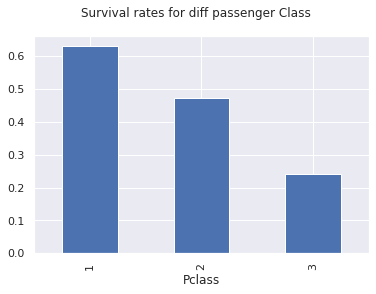

In [200]:
#Survival rate for different passenger Class
df[['Pclass',"Survived"]].groupby('Pclass')['Survived'].mean().plot(kind='bar',figsize=(6,4))
plt.suptitle("Survival rates for diff passenger Class")

In [201]:
#Step 4 : Feature Engg
#1 Fixing Null values 
#2 Removing Outliers 
#3 Deriving New Feature from Existing Features 
#4 Removing Irrelevant Features
#5 One hot Encoding 

In [202]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

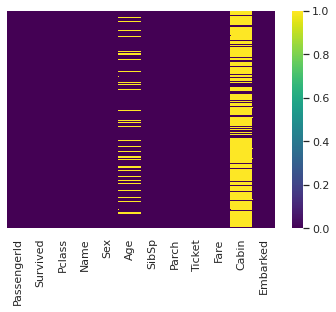

In [203]:
#null value distribution represented by heatmap
sb.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

In [204]:
#4.1.1#Dropping Cabin(Had lot of null values)

df.drop("Cabin",axis=1, inplace = True)

In [205]:
#4.1.2 #mode of embarked
df['Embarked'].mode()

0    S
dtype: object

In [206]:
#replacing null age with median age and Null embarked with mode value
df= df.fillna({'Embarked':'S'})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [207]:
#4.1.3 
display(df.groupby(['Pclass','Sex'])['Age'].median())

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [208]:
df['Age'].median()

28.0

In [209]:
#Filing the empty age by median age grouping by Pclass and sex
df['Age']= df.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [210]:
#Checking the median age of passengers
df['Age'].median()

26.0

In [211]:
df.isnull().sum()
#No Null Values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [212]:
#4.2 Handling Outliers 



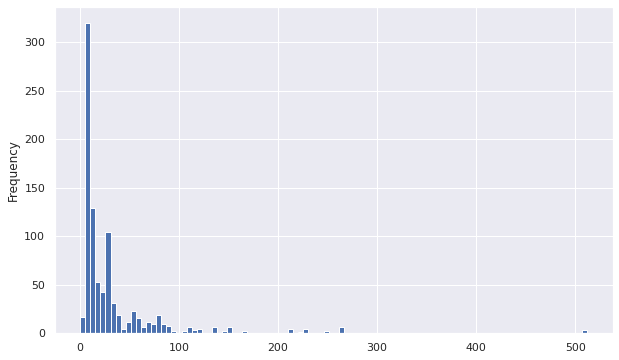

In [213]:
#Fare Distribution of the passengers

df['Fare'].plot.hist(bins=100,figsize=(10,6))

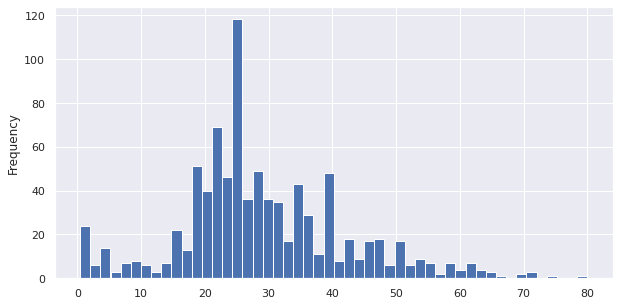

In [214]:
#Age distribution of the passengers 
df['Age'].plot.hist(bins=50,figsize=(10,5))

In [215]:
upp_limit = df['Age'].quantile(.99)
low_limit = df['Age'].quantile(.01)

df = df[(df['Age']<upp_limit)& (df['Age']>low_limit)]

In [216]:
ul = df['Fare'].quantile(.99)
ll = df['Fare'].quantile(.01)

df = df[(df['Fare']<ul)& (df['Fare']>ll)]

In [217]:
df.shape

(842, 11)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  842 non-null    int64  
 1   Survived     842 non-null    int64  
 2   Pclass       842 non-null    int64  
 3   Name         842 non-null    object 
 4   Sex          842 non-null    object 
 5   Age          842 non-null    float64
 6   SibSp        842 non-null    int64  
 7   Parch        842 non-null    int64  
 8   Ticket       842 non-null    object 
 9   Fare         842 non-null    float64
 10  Embarked     842 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 78.9+ KB


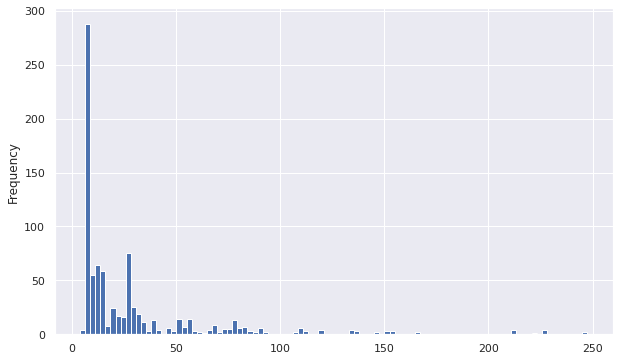

In [219]:
df['Fare'].plot.hist(bins=100,figsize=(10,6))

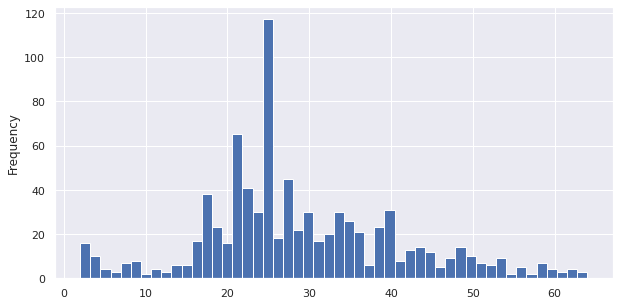

In [220]:
#Age distribution of the passengers 
df['Age'].plot.hist(bins=50,figsize=(10,5))

In [221]:
#4.3 Deriving new features from Existing Features 
# Combining parch and SibSp to make a new feature Family Size
df['FamilySize']= df['SibSp']+df['Parch']+1
df['FamilySize'].head(5)

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

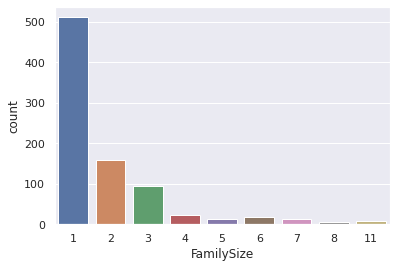

In [222]:
#Graph with Family Size: Over 500 People came alone
sb.countplot(x="FamilySize", data = df)

In [223]:
# 4.4 Dropping the Irrelevant features

df.drop(["Name","PassengerId","Ticket","SibSp","Parch"],axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [224]:
#4.5 One hot encoding of 'Embarked', 'Sex', 'Pclass'



In [225]:
#Creating dummy value and dropping first column 

Sex = pd.get_dummies(df["Sex"], drop_first = True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [226]:
#Creating dummy value and dropping first column 
Embark = pd.get_dummies(df["Embarked"], drop_first=True)
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [227]:
#Creating dummy value for Pclass and dropping first column 
Pclass = pd.get_dummies(df["Pclass"], drop_first= True)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [228]:
#Concatenating the dummy value columns 
df1 = pd.concat([df,Sex,Embark,Pclass],axis=1) 
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,male,Q,S,2,3
0,0,3,male,22.0,7.2500,S,2,1,0,1,0,1
1,1,1,female,38.0,71.2833,C,2,0,0,0,0,0
2,1,3,female,26.0,7.9250,S,1,0,0,1,0,1
3,1,1,female,35.0,53.1000,S,2,0,0,1,0,0
4,0,3,male,35.0,8.0500,S,1,1,0,1,0,1


In [229]:
#Step 5 Feature Selection 

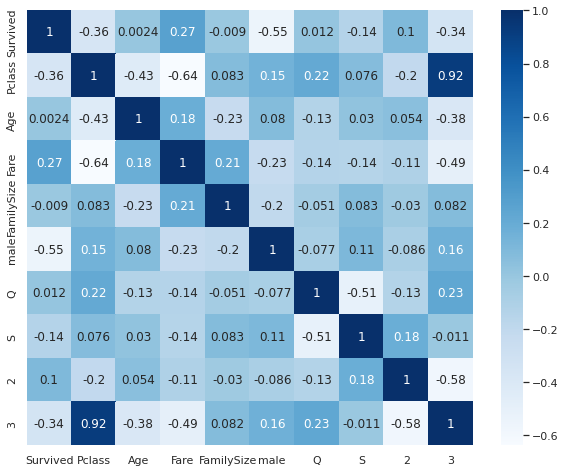

In [230]:

sb.set(rc = {'figure.figsize':(10,8)})
sb.heatmap(df1.corr(),cmap= "Blues",annot=True)

In [231]:
#Dropping the duplicate Features

df1.drop(["Pclass","Sex","Embarked","Fare"],axis=1, inplace = True)
df1.head()


,Survived,Age,FamilySize,male,Q,S,2,3
0,0,22.0,2,1,0,1,0,1
1,1,38.0,2,0,0,0,0,0
2,1,26.0,1,0,0,1,0,1
3,1,35.0,2,0,0,1,0,0
4,0,35.0,1,1,0,1,0,1


In [232]:
#Step 6 Building Logistic regression Model 

#Separting Independent and Dependent Variables 
x = df1.drop("Survived",axis=1)
y = df1["Survived"]

In [233]:
#Splitting x and y into training and testing in a ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30, random_state= 42)


In [234]:
#Fit Model 
Tit_model = LogisticRegression()
Tit_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [235]:
predictions = Tit_model.predict(x_test)
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [236]:
#Accuracy of the Training data set
Tit_model.score(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8098471986417657

In [237]:
#Accuracy of the Testing data set

Tit_model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8300395256916996

In [238]:
#Classification: Precision, Recall, F1 Score
from sklearn import metrics


print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       157
           1       0.84      0.68      0.75        96

    accuracy                           0.83       253
   macro avg       0.83      0.80      0.81       253
weighted avg       0.83      0.83      0.83       253



In [239]:
#Confusion Metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[145,  12],
       [ 31,  65]])

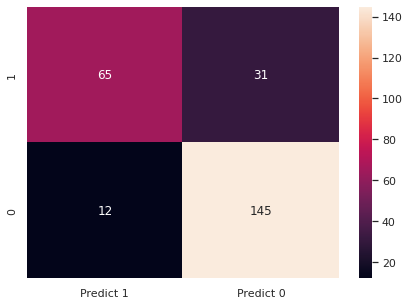

In [240]:
#Confusion Metrics

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sb.heatmap(df_cm,annot= True,fmt= 'g')

In [241]:
#Finding the Coeff and intercept of the model.

coef_df = pd.DataFrame(Tit_model.coef_)
coef_df['intercept'] = Tit_model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.021828 -0.199725 -2.493022  0.008777 -0.429841 -0.802781 -2.197946   

   intercept  
0   3.618104  


In [242]:
#Defining the sigmoid function and importing math
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))



In [242]:
#Step 6b Check the accuracy with Random Forest 
#Step 6.2.1 Feature Importance 
#Step 6.2.2 Building Random Forest Model 

In [287]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit (x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [288]:
feature_imp = pd.Series(rf1.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp


Age           0.390197
male          0.298164
3             0.126227
FamilySize    0.110505
2             0.030998
S             0.029832
Q             0.014077
dtype: float64

In [289]:
#Splitting x and y into training and testing in a ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30, random_state= 42)

In [290]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit (x_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [291]:
y_pred = rf.predict (x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [292]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7956807324840764

In [293]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8142292490118577


In [282]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

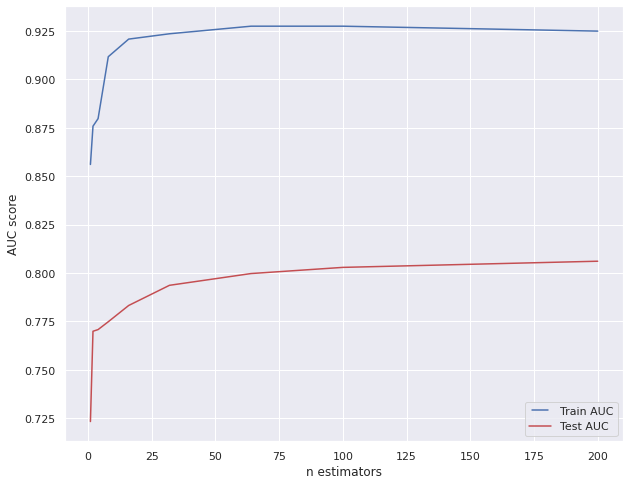

<Figure size 576x288 with 0 Axes>

In [294]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results= []
test_results = []
for estimator in n_estimators:
  rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
  rf.fit(x_train, y_train)

  train_pred = rf.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(x_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1,= plt.plot(n_estimators, train_results,"b",label= "Train AUC")
line2, = plt.plot(n_estimators, test_results, "r",label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel ("n estimators")
plt.figure(figsize=(8,4))
plt.show()